In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('C:/Users/test4/Desktop/대학 강의/2-2/데이터처리프로그래밍/dataset/05_data1.xlsx')
data.head()

,no,city_code,gender,age_code,height,weight,waist,systolic,diastolic,blood_sugar,cholesterol,triglycerides,HDL,LDL,hemoglobin,serum,smoking,drinking
0,1,36,1,9,165,60,72.1,127,79,90,188,58,58.0,118,15.0,1.1,1,0
1,5,41,2,12,155,50,75.2,144,89,110,220,171,53.0,133,12.4,0.7,1,0
2,6,27,1,9,185,85,94.0,114,72,86,234,183,50.0,147,16.4,1.1,3,1
3,7,44,1,9,165,80,93.0,112,73,250,119,265,26.0,40,15.7,0.7,3,1
4,9,41,2,17,150,50,82.0,136,65,104,177,61,63.0,101,13.3,0.7,1,0


In [39]:
data2 = data.loc[:, ['gender','height', 'weight', 'waist', 'drinking', 'smoking']]
data2.loc[data2['gender']==1,['gender']]='M'
data2.loc[data2['gender']==2,['gender']]='F'
data2.loc[data2['drinking']==0,['drinking']]='Non-drinking'
data2.loc[data2['drinking']==1,['drinking']]='Drinking'
data2.loc[data2['smoking']==1,['smoking']]='Non-smoking'
data2.loc[data2['smoking']==2,['smoking']]='Quit-smoking'
data2.loc[data2['smoking']==3,['smoking']]='Smoking'

In [40]:
drinking = data2.groupby(['gender','drinking'])['drinking'].count()
smoking = data2.groupby(['gender','smoking'])['smoking'].count()
drinking = drinking.to_frame(name='count')
smoking = smoking.to_frame(name='count')
drinking = drinking.reset_index()
smoking = smoking.reset_index()

In [41]:
print(drinking)

  gender      drinking  count
0      F      Drinking    611
1      F  Non-drinking    888
2      M      Drinking   1086
3      M  Non-drinking    415


In [42]:
print(smoking)

  gender       smoking  count
0      F   Non-smoking   1422
1      F  Quit-smoking     45
2      F       Smoking     32
3      M   Non-smoking    502
4      M  Quit-smoking    519
5      M       Smoking    480


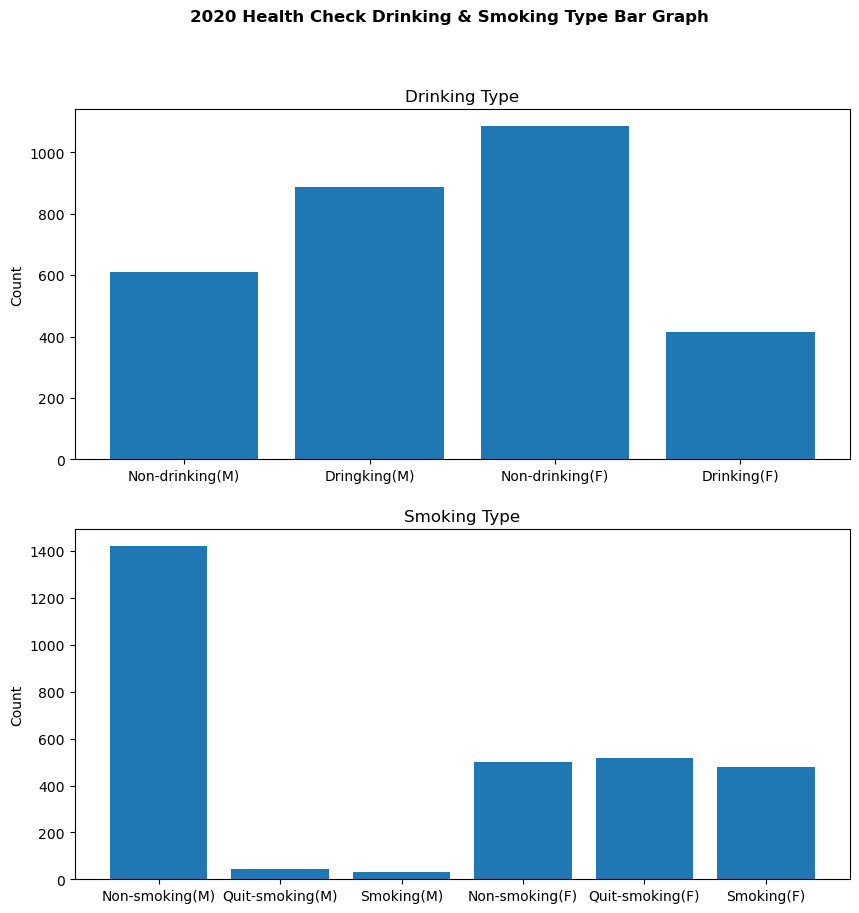

In [43]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('2020 Health Check Drinking & Smoking Type Bar Graph', fontweight='bold')
index1 = np.arange(4)
index2 = np.arange(6)

fig.add_subplot(2,1,1)

plt.bar(index1, drinking['count'])
plt.title('Drinking Type')
plt.ylabel('Count')
plt.xticks(index1, ['Non-drinking(M)','Dringking(M)','Non-drinking(F)','Drinking(F)'])

fig.add_subplot(2,1,2)

plt.bar(index2, smoking['count'])
plt.title('Smoking Type')
plt.ylabel('Count')
plt.xticks(index2, ['Non-smoking(M)','Quit-smoking(M)','Smoking(M)','Non-smoking(F)', 'Quit-smoking(F)', 'Smoking(F)'])
plt.show()

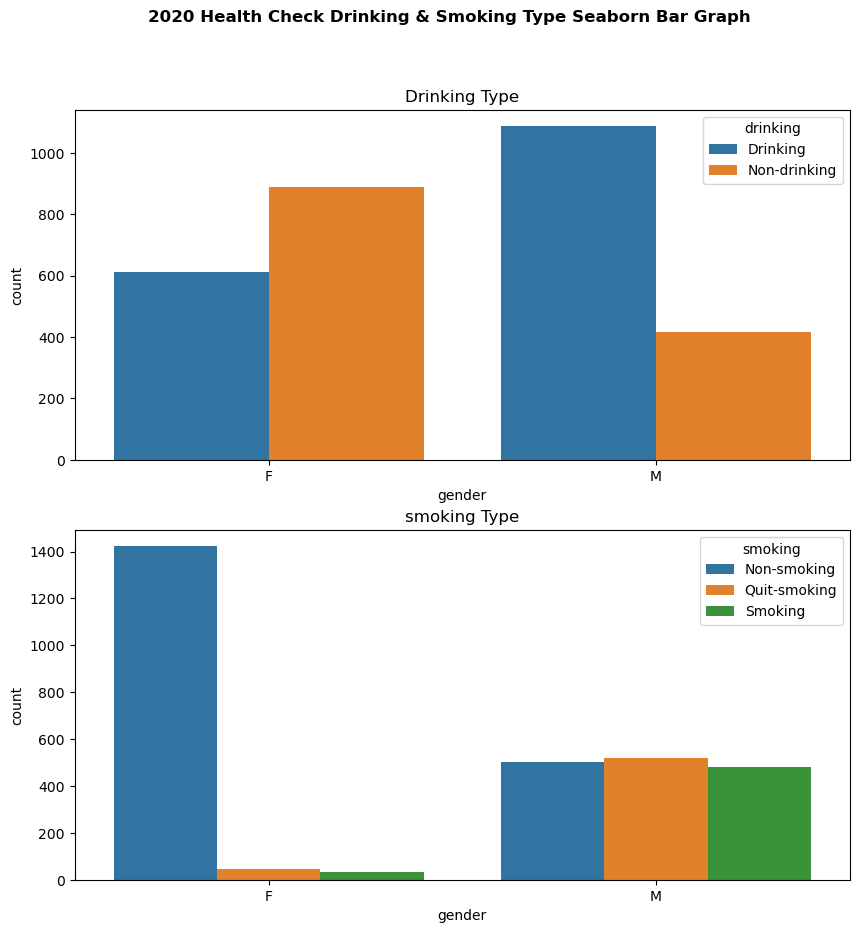

In [44]:
fig = plt.figure(figsize=(10,10))

area1 = fig.add_subplot(2,1,1)
area2 = fig.add_subplot(2,1,2)
ax1 = sns.barplot(x='gender', y='count', hue='drinking', data=drinking, ax=area1)
ax2 = sns.barplot(x='gender', y='count', hue='smoking', data=smoking, ax=area2)

fig.suptitle('2020 Health Check Drinking & Smoking Type Seaborn Bar Graph', fontweight = 'bold')
area1.set_title('Drinking Type')
area2.set_title('smoking Type')

plt.show()

In [45]:
data['BMI'] = (data['weight'] / ((data['height'] / 100) ** 2))
data['BMI']

0       22.038567
1       20.811655
2       24.835646
3       29.384757
4       22.222222
          ...    
2995    22.892820
2996    24.973985
2997    22.038567
2998    27.777778
2999    25.390625
Name: BMI, Length: 3000, dtype: float64

In [46]:
data4 = data.loc[:, ['gender', 'height', 'weight', 'blood_sugar']]
data4.loc[data['gender']==1, ['gender']]='M'
data4.loc[data['gender']==2, ['gender']]='F'

data4.loc[data['blood_sugar'] >= 120, ['blood_sugar']]='Over'
data4.loc[data['blood_sugar'] < 120, ['blood_sugar']]='Under'

data4.loc[data['BMI'] <= 23, ['BMI']]='Normal'
data4.loc[(data['BMI'] > 23) & (data['BMI'] < 25), ['BMI']]='Overweight'
data4.loc[data['BMI'] >= 25, ['BMI']]='Obesity'

In [47]:
Blood_sugar = data4.groupby(['gender', 'blood_sugar'])['blood_sugar'].count()
BMI = data4.groupby(['gender', 'BMI'])['BMI'].count()

Blood_sugar = Blood_sugar.to_frame(name='count')
BMI = BMI.to_frame(name='count')

Blood_sugar = Blood_sugar.reset_index()
BMI = BMI.reset_index()

BMI

,gender,BMI,count
0,F,Normal,789
1,F,Obesity,408
2,F,Overweight,302
3,M,Normal,443
4,M,Obesity,672
5,M,Overweight,386


In [48]:
Blood_sugar

,gender,blood_sugar,count
0,F,Over,145
1,F,Under,1354
2,M,Over,276
3,M,Under,1225


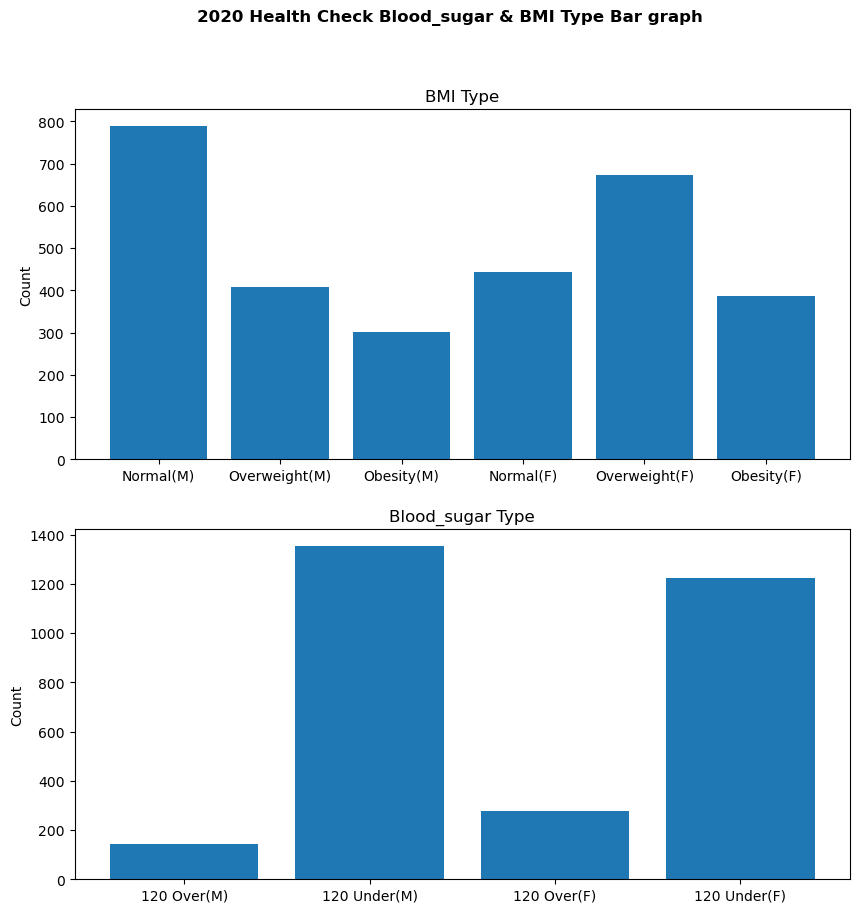

In [49]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('2020 Health Check Blood_sugar & BMI Type Bar graph', fontweight='bold')
index1 = np.arange(6)
index2 = np.arange(4)

fig.add_subplot(2,1,1) 

plt.bar(index1, BMI['count'])
plt.title('BMI Type')
plt.ylabel('Count')
plt.xticks(index1, ['Normal(M)', 'Overweight(M)', 'Obesity(M)', 'Normal(F)', 'Overweight(F)', 'Obesity(F)'])


fig.add_subplot(2,1,2) 

plt.bar(index2, Blood_sugar['count'])
plt.title('Blood_sugar Type')
plt.ylabel('Count')
plt.xticks(index2, ['120 Over(M)', '120 Under(M)', '120 Over(F)', '120 Under(F)'])



plt.show()

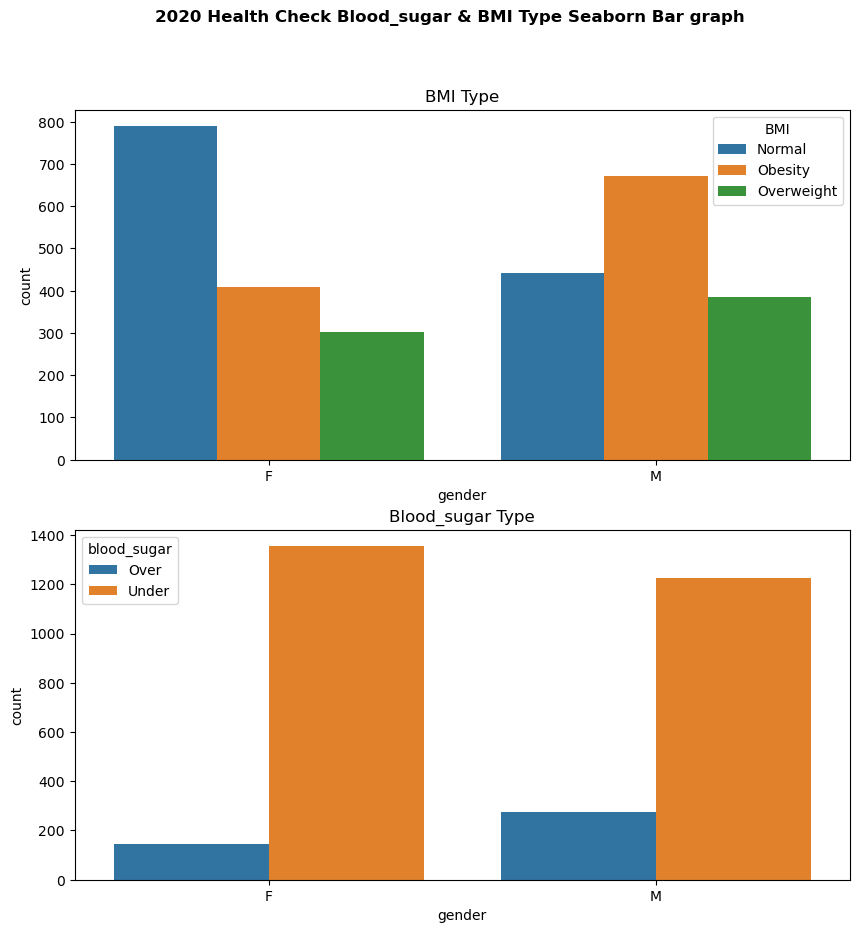

In [50]:
fig = plt.figure(figsize=(10,10))

area1 = fig.add_subplot(2,1,1)
area2 = fig.add_subplot(2,1,2)

ax1 = sns.barplot(x='gender', y='count', hue='BMI', data=BMI, ax=area1)
ax2 = sns.barplot(x='gender', y='count', hue='blood_sugar', data=Blood_sugar, ax=area2)


fig.suptitle('2020 Health Check Blood_sugar & BMI Type Seaborn Bar graph', fontweight='bold')
area1.set_title('BMI Type')
area2.set_title('Blood_sugar Type')


plt.show()